In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vryburg
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | high level
Processing Record 13 of Set 1 | abadan
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nelson bay
Processing Record 19 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | sedelnikovo
City not found. Skipping...
Processing Record 2

Processing Record 37 of Set 4 | ust-ishim
Processing Record 38 of Set 4 | panacan
Processing Record 39 of Set 4 | athabasca
Processing Record 40 of Set 4 | manali
Processing Record 41 of Set 4 | milford
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | waddan
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | mahanoro
Processing Record 47 of Set 4 | karakose
City not found. Skipping...
Processing Record 48 of Set 4 | oda
Processing Record 49 of Set 4 | jalu
Processing Record 50 of Set 4 | kinshasa
Processing Record 1 of Set 5 | cavaillon
Processing Record 2 of Set 5 | grand forks
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | zheleznodorozhnyy
Processing Record 6 of Set 5 | kidal
Processing Record 7 of Set 5 | weyburn
Processing Record 8 of Set 5 | quatre cocos
Processing Record 9 of Set 5 | christchurch
Processing Record 10 of Set 5 | mb

Processing Record 27 of Set 8 | chupa
Processing Record 28 of Set 8 | zacatepec
Processing Record 29 of Set 8 | kozan
Processing Record 30 of Set 8 | kendari
Processing Record 31 of Set 8 | cayenne
Processing Record 32 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 33 of Set 8 | tomatlan
Processing Record 34 of Set 8 | usinsk
Processing Record 35 of Set 8 | hamilton
Processing Record 36 of Set 8 | cajibio
Processing Record 37 of Set 8 | oum hadjer
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | guerrero negro
Processing Record 40 of Set 8 | ust-maya
Processing Record 41 of Set 8 | sabya
Processing Record 42 of Set 8 | lolua
City not found. Skipping...
Processing Record 43 of Set 8 | iracoubo
Processing Record 44 of Set 8 | corn island
Processing Record 45 of Set 8 | luis correia
Processing Record 46 of Set 8 | provideniya
Processing Record 47 of Set 8 | brawley
Processing Record 48 of Set 8 | kupang
Processing Record 49 of Set 

Processing Record 13 of Set 12 | matata
Processing Record 14 of Set 12 | sechura
Processing Record 15 of Set 12 | nishihara
Processing Record 16 of Set 12 | santa isabel
Processing Record 17 of Set 12 | ous
Processing Record 18 of Set 12 | parrita
Processing Record 19 of Set 12 | northam
Processing Record 20 of Set 12 | kristiinankaupunki
Processing Record 21 of Set 12 | damara
Processing Record 22 of Set 12 | barawe
City not found. Skipping...
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | avera
Processing Record 25 of Set 12 | faya
Processing Record 26 of Set 12 | paradwip
City not found. Skipping...
Processing Record 27 of Set 12 | almansa
Processing Record 28 of Set 12 | kattivakkam
Processing Record 29 of Set 12 | henties bay
Processing Record 30 of Set 12 | kholodnyy
Processing Record 31 of Set 12 | shenjiamen
Processing Record 32 of Set 12 | bac lieu
Processing Record 33 of Set 12 | acapulco
Processing Record 34 of Set 12 | 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,81.00,23,100,3.00,AU,2020-11-02 02:42:55
1,Alofi,-19.06,-169.92,78.80,83,19,14.99,NU,2020-11-02 02:42:55
2,Kaitangata,-46.28,169.85,54.00,59,91,11.01,NZ,2020-11-02 02:42:56
3,Ushuaia,-54.80,-68.30,57.20,54,75,4.70,AR,2020-11-02 02:42:56
4,Vryburg,-26.96,24.73,59.61,83,2,5.75,ZA,2020-11-02 02:42:56
5,Mount Gambier,-37.83,140.77,80.60,32,43,14.99,AU,2020-11-02 02:42:56
6,Ribeira Grande,38.52,-28.70,62.73,75,38,18.81,PT,2020-11-02 02:42:56
7,Victoria,22.29,114.16,80.01,60,100,1.01,HK,2020-11-02 02:40:01
8,Busselton,-33.65,115.33,61.00,82,99,4.90,AU,2020-11-02 02:42:57
9,Punta Arenas,-53.15,-70.92,51.80,76,0,4.70,CL,2020-11-02 02:39:20


In [9]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2020-11-02 02:42:55,-42.78,147.06,81.00,23,100,3.00
1,Alofi,NU,2020-11-02 02:42:55,-19.06,-169.92,78.80,83,19,14.99
2,Kaitangata,NZ,2020-11-02 02:42:56,-46.28,169.85,54.00,59,91,11.01
3,Ushuaia,AR,2020-11-02 02:42:56,-54.80,-68.30,57.20,54,75,4.70
4,Vryburg,ZA,2020-11-02 02:42:56,-26.96,24.73,59.61,83,2,5.75
...,...,...,...,...,...,...,...,...,...
577,Eureka,US,2020-11-02 02:42:49,40.80,-124.16,52.00,85,0,1.45
578,Vengerovo,RU,2020-11-02 02:45:36,55.68,76.75,33.31,90,98,10.40
579,Morondava,MG,2020-11-02 02:44:06,-20.28,44.28,76.32,74,0,2.39
580,Calderitas,MX,2020-11-02 02:45:36,18.55,-88.25,75.43,90,57,13.42


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/01/20'

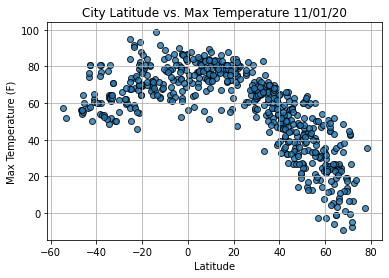

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

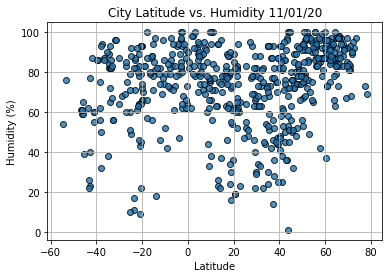

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

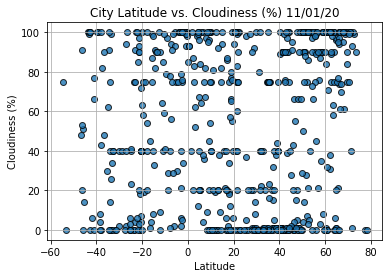

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

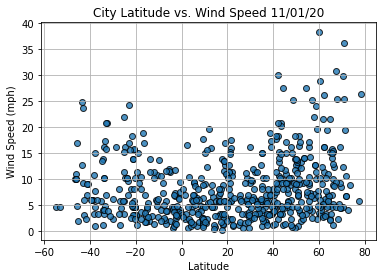

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2020-11-02 02:42:58
Lat                          69.7
Lng                        170.31
Max Temp                    13.98
Humidity                       97
Cloudiness                    100
Wind Speed                   8.39
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

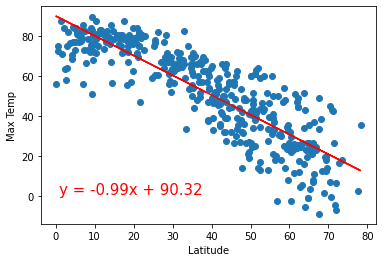

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# CAll the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(1,1))

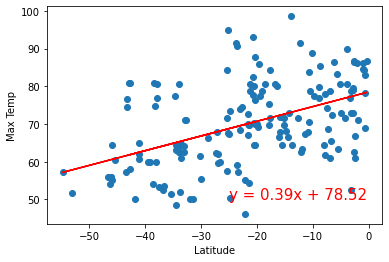

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,50))

In [23]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

LinregressResult(slope=0.38994590235162446, intercept=78.52116179895695, rvalue=0.47866754250402666, pvalue=5.2804828828655084e-11, stderr=0.0555148268210007)

In [24]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.9929119012909021, intercept=90.31504233848858, rvalue=-0.8539305184596727, pvalue=6.150672635223129e-119, stderr=0.02981027922563496)

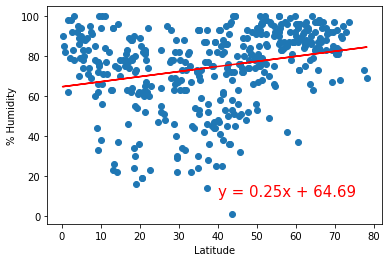

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

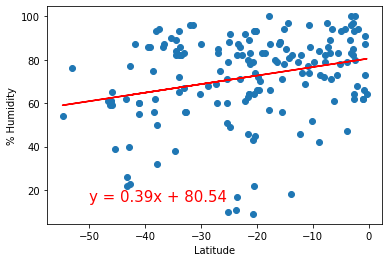

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [27]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

LinregressResult(slope=0.2539423339937096, intercept=64.69205732650805, rvalue=0.2552446561225128, pvalue=1.4002035448529828e-07, stderr=0.04739154258969835)

In [28]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

LinregressResult(slope=0.39283723628256234, intercept=80.54091403992177, rvalue=0.2714124636371988, pvalue=0.0003727233341604885, stderr=0.10812171279125803)

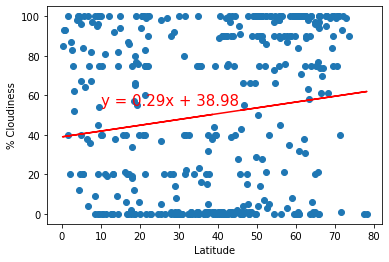

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

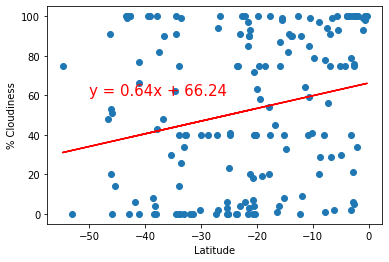

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [31]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

LinregressResult(slope=0.29348343409401767, intercept=38.98276037956677, rvalue=0.14356762964272649, pvalue=0.003416804853717918, stderr=0.09966803998912792)

In [32]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

LinregressResult(slope=0.29348343409401767, intercept=38.98276037956677, rvalue=0.14356762964272649, pvalue=0.003416804853717918, stderr=0.09966803998912792)

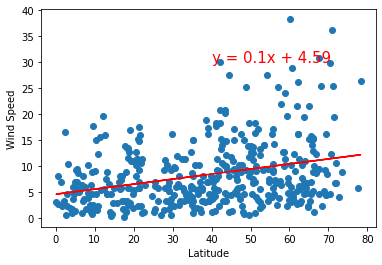

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

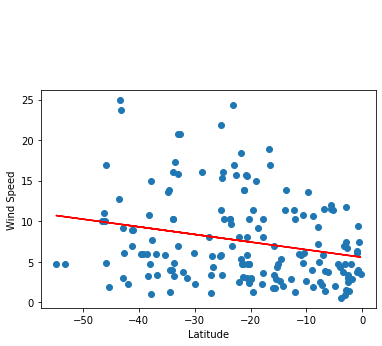

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))